In [97]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
from matplotlib.path import Path

matplotlib.style.use('ggplot')

import math
import time
import datetime
import json

from pandas import DataFrame, Series
import pandas as pd
import numpy as np


In [95]:
!wc -l amis_articles.jsonl

  106886 amis_articles.jsonl


In [93]:
finish_time = datetime.datetime(2016, 6, 28, 19, 49, 19, 976366)
start_time = datetime.datetime(2016, 6, 28, 17, 32, 48, 6452)
(finish_time - start_time).total_seconds() / 60 / 60

2.2755471983333333

In [94]:
with open('amis_articles.jsonl') as f:
    articles = pd.DataFrame(json.loads(line) for line in f)

articles.head(5)

,article,date,link,source,title
0,Thirty staff members were firedby online makeu...,2016-06-28 00:00:00,http://www.bloomberg.com/news/articles/2016-06...,bloomberg,Struggling Online Makeup Retailer Birchbox Cut...
1,"In the course of your life, youll spend an ave...",2016-06-28 00:00:00,http://www.bloomberg.com/news/articles/2016-06...,bloomberg,The End of Traffic: How the Smartest People in...
2,The selloff following the U.K.s secession vote...,2016-06-28 00:00:00,http://www.bloomberg.com/news/articles/2016-06...,bloomberg,"There’s Risk of a ‘Buyer’s Strike’ in Stocks, ..."
3,Gilead Sciences Inc.s hepatitis C drug was app...,2016-06-28 00:00:00,http://www.bloomberg.com/news/articles/2016-06...,bloomberg,"Gilead’s New Hepatitis C Drug Approved by FDA,..."
4,$30 billion: Commercial investment in China s ...,2016-06-26 00:00:00,http://www.bloomberg.com/news/articles/2016-06...,bloomberg,‘Sea Turtles’ Give China’s Drug Startups a Sho...


source
agrimoney        35
bloomberg     30909
euractiv      67795
noggers        4779
worldgrain     3368
Name: title, dtype: int64

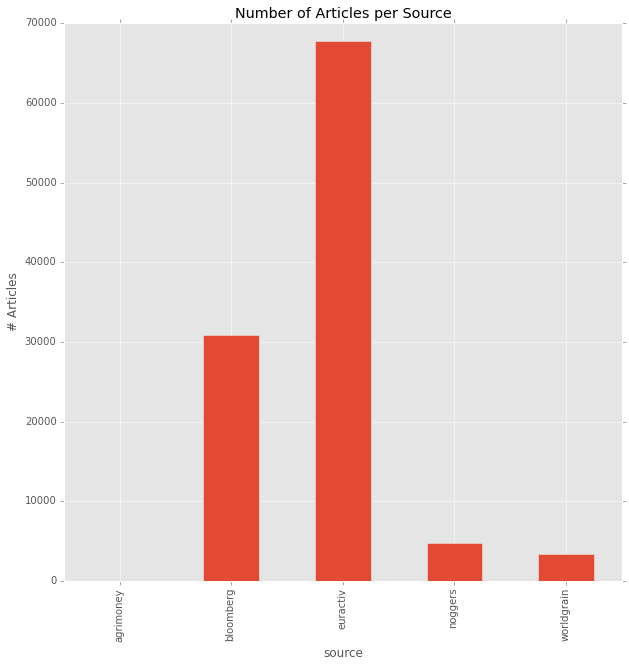

In [96]:
counts_by_source = articles.groupby('source').title.count()
axh = counts_by_source.plot(kind='bar', figsize=(10, 10))
axh.set_title("Number of Articles per Source")
axh.set_ylabel("# Articles")
counts_by_source

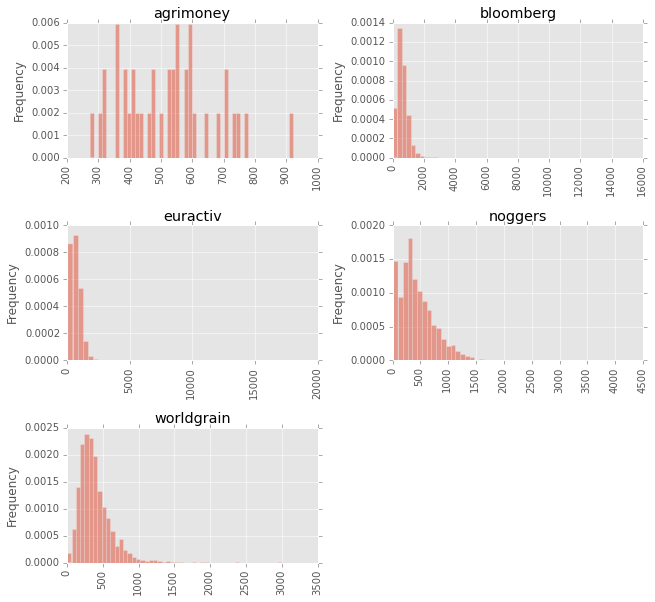

In [86]:
# raw article length
axh = articles.article.apply(lambda x: len(x.split(' ')))\
.hist(by=articles.source, alpha=0.5, bins=50, figsize=(10, 10), normed=True)
axh = [item for sublist in list(axh) for item in sublist]
#[ax.set_title("Normalized Histogram [{0}]".format(ax.get_title())) for ax in axh]
[ax.set_xlabel ("Raw Article Length [words]") for ax in axh]
[ax.set_ylabel ("Frequency") for ax in axh]


In [ ]:
# timeframe (from when to when)

In [91]:
# timeframe (count per date per source)
articles['date'] = pd.to_datetime(articles['date'])
articles['timestamp'] = articles['date'].apply(lambda d: time.mktime(d.timetuple()))

# Binning delta
delta = datetime.timedelta(days=1)


# Calculate bins
bins = np.arange(min(articles['timestamp']), max(articles['timestamp']) + delta.hours, delta.hours)

# Group columns by datetime bin
def bin_from_tstamp(tstamp):
    diffs = [abs(tstamp - bin) for bin in bins]
    return bins[diffs.index(min(diffs))]

counts_by_day = articles.groupby(articles['timestamp'].map(
    lambda t: datetime.datetime.fromtimestamp(bin_from_tstamp(t))
)).count()
axh = counts_by_day.plot(kind='bar', figsize=(10, 10))
axh.set_title("Number of Articles per Day")
axh.set_ylabel("# Articles")


AttributeError: 'datetime.timedelta' object has no attribute 'hours'

In [92]:
delta

datetime.timedelta(1)

In [ ]:
# process the articles

In [ ]:
#duration_by_distance = labeled_data\
#    .groupby(pd.qcut(labeled_data.trip_distance, 10)).log_duration.mean()
